<a href="https://colab.research.google.com/github/GambimL/visao-computacional-provas/blob/master/arquivo_de_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from imutils.perspective import four_point_transform
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

# define the answer key which maps the question number
# to the correct answer
ANSWER_KEY = {0: 1, 1: 0, 2: 0, 3: 4, 4: 1, 5: 3, 6: 3, 7: 2, 8: 2, 9: 4}
print(ANSWER_KEY)

{0: 1, 1: 0, 2: 0, 3: 4, 4: 1, 5: 3, 6: 3, 7: 2, 8: 2, 9: 4}


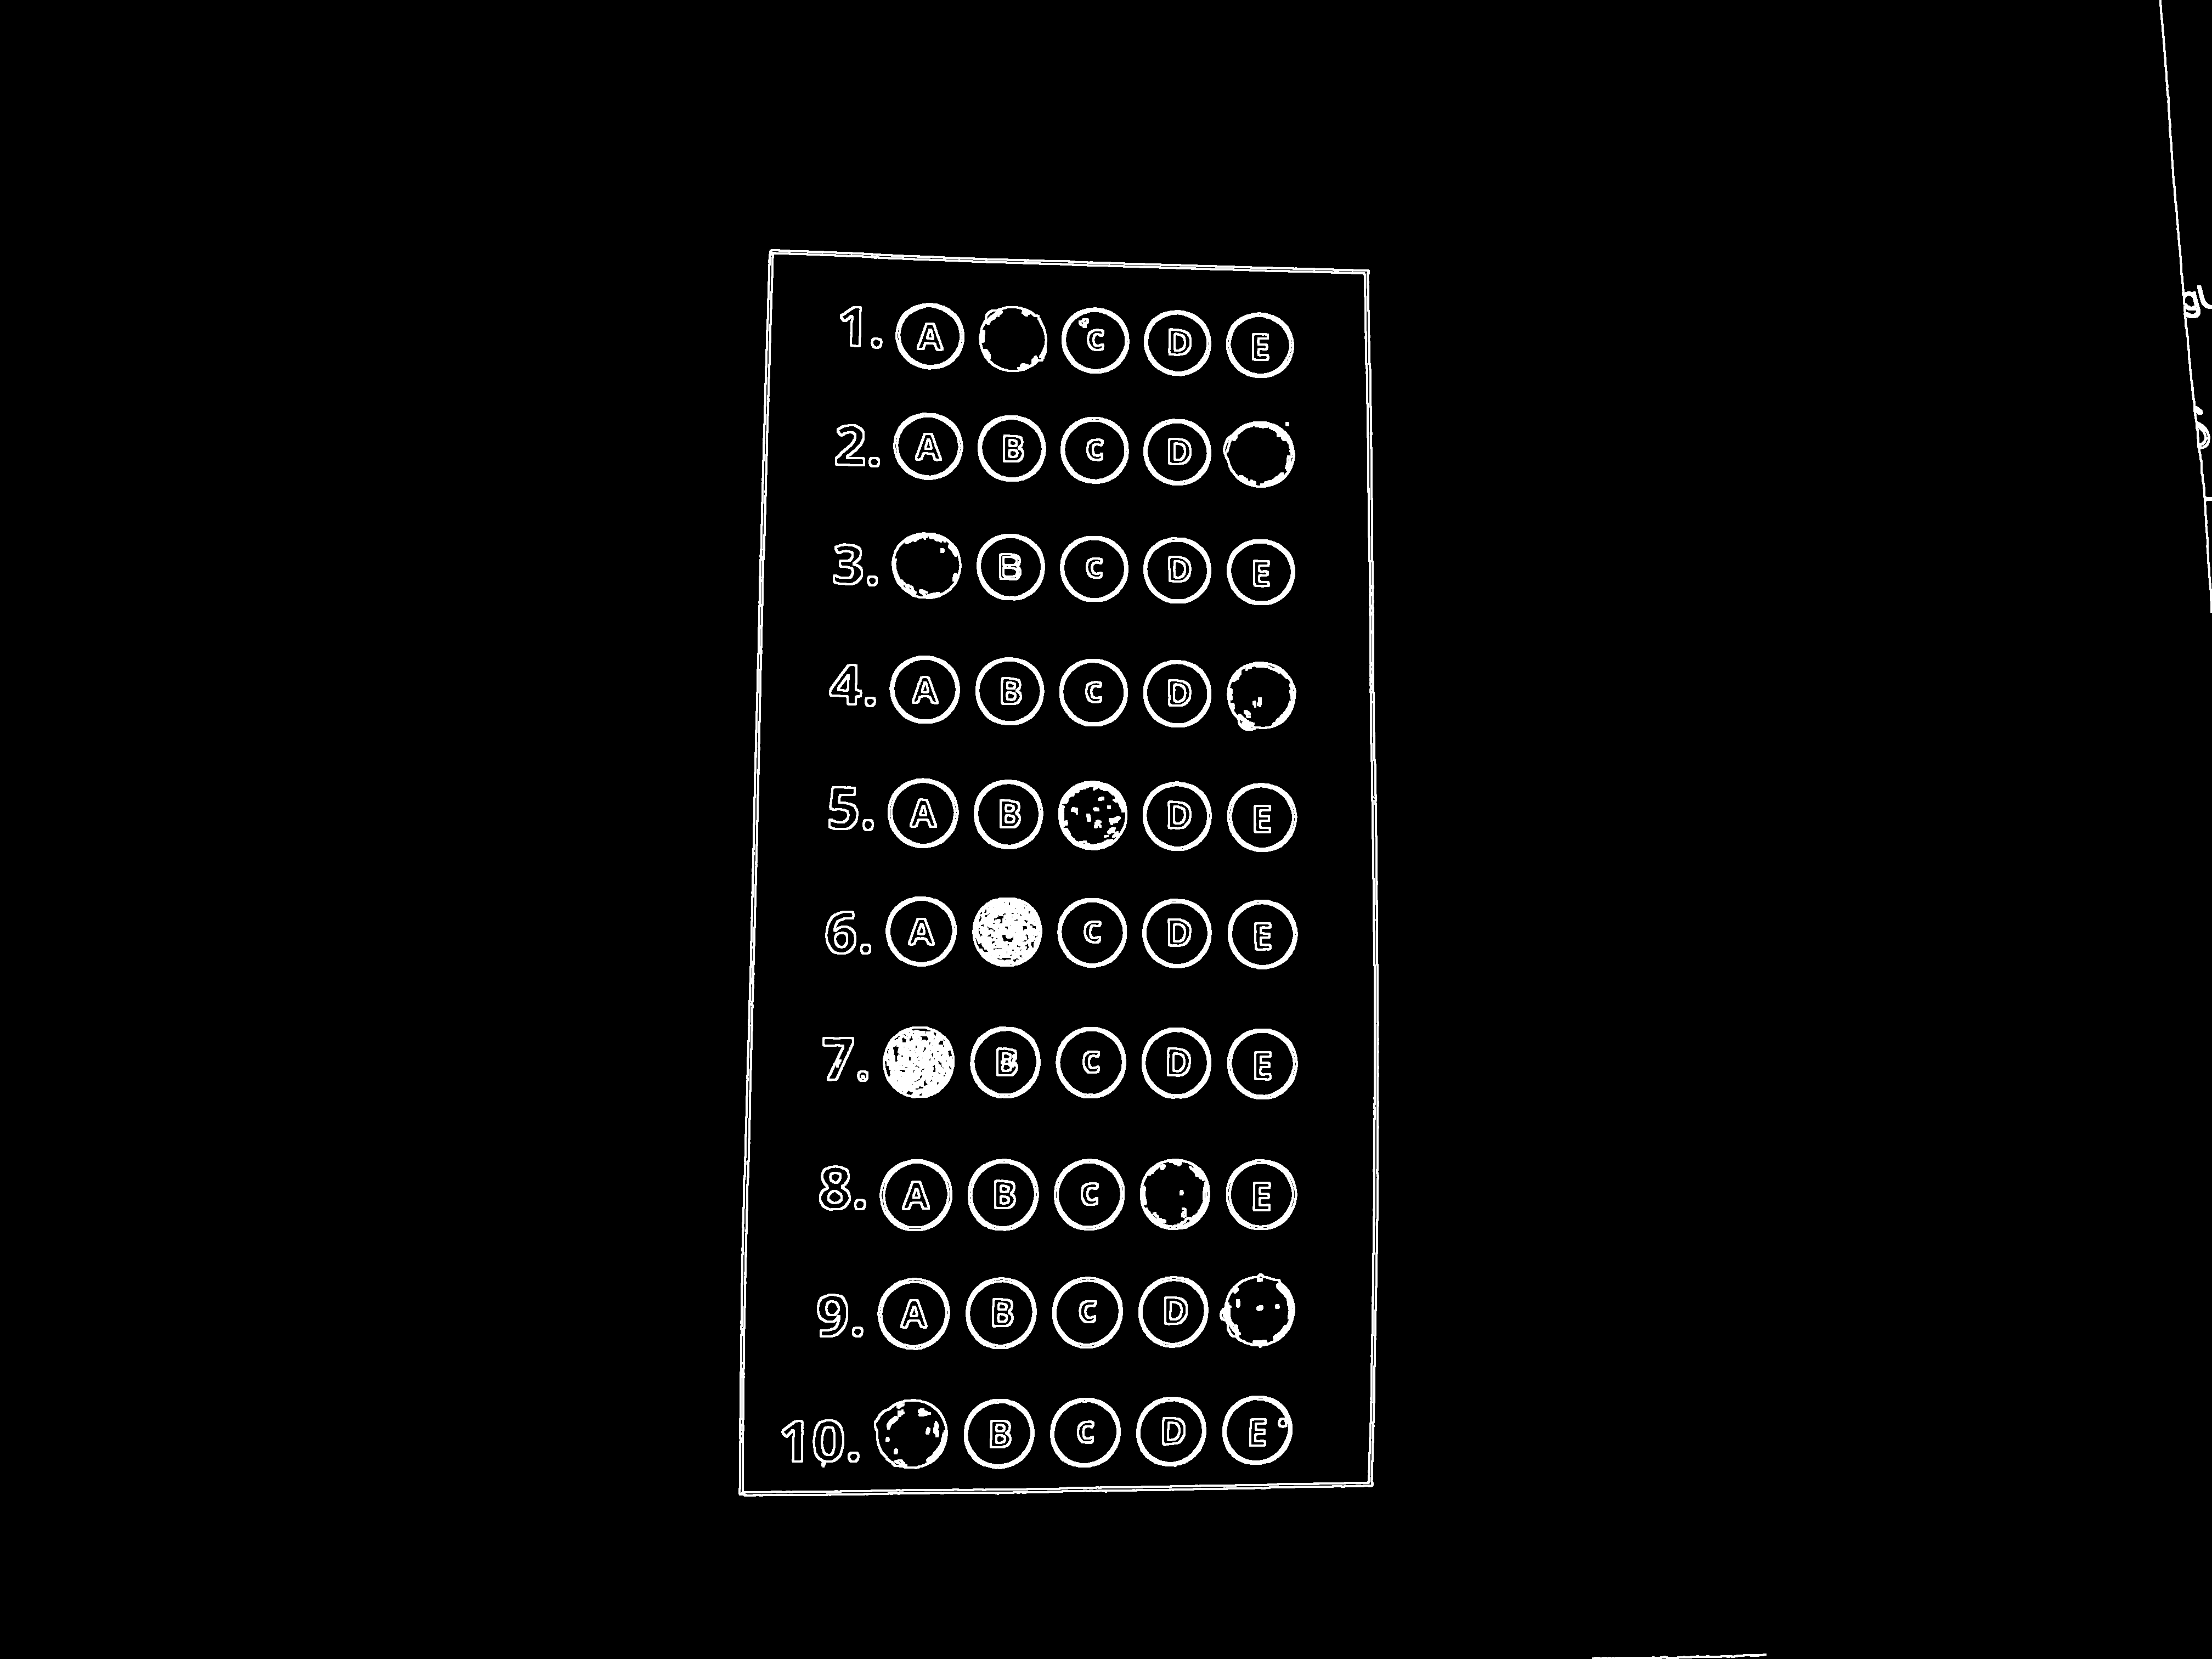

In [3]:
image = cv2.imread('IMG_6796.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)
kernel = np.ones((4,4),np.uint8)
dilation = cv2.dilate(edged,kernel,iterations = 1)
cv2_imshow(dilation)

In [4]:
cnts = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
docCnt = None

if len(cnts) > 0:
	cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
	for c in cnts:
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.02 * peri, True)


		if len(approx) == 4:
			docCnt = approx
			break
		print(docCnt)
print(len(approx))


4


756,379


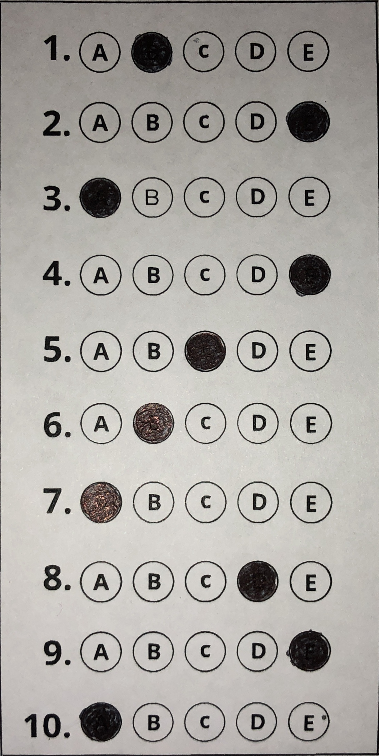

In [5]:
paper = four_point_transform(image, docCnt.reshape(4, 2))
warped = four_point_transform(gray, docCnt.reshape(4, 2))
paper = cv2.resize(paper, dsize=(379, 756), interpolation=cv2.INTER_CUBIC)
print(f'{paper.shape[0]},{paper.shape[1]}' )
cv2_imshow(paper)

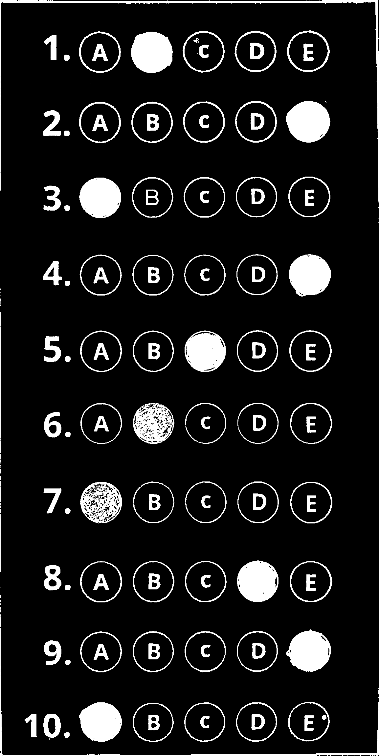

In [6]:
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh = cv2.resize(thresh, dsize=(379, 756))
cv2_imshow(thresh)

2
w6
h6
1.0
w18
h26
0.6923076923076923
w13
h24
0.5416666666666666
w41
h39
1.0512820512820513
w42
h40
1.05
w41
h41
1.0
w41
h40
1.025
w43
h40
1.075
w1
h1
1.0
w1
h5
0.2
w1
h1
1.0
w6
h5
1.2
w18
h25
0.72
w41
h41
1.0
w42
h42
1.0
w41
h42
0.9761904761904762
w42
h42
1.0
w46
h43
1.069767441860465
w379
h128
2.9609375
w1
h13
0.07692307692307693
w1
h6
0.16666666666666666
w1
h2
0.5
w1
h2
0.5
w1
h3
0.3333333333333333
w1
h1
1.0
w6
h5
1.2
w18
h26
0.6923076923076923
w43
h41
1.048780487804878
w42
h41
1.024390243902439
w42
h42
1.0
w42
h42
1.0
w42
h42
1.0
w1
h58
0.017241379310344827
w1
h4
0.25
w6
h6
1.0
w1
h5
0.2
w19
h26
0.7307692307692307
w43
h42
1.0238095238095237
w42
h42
1.0
w42
h42
1.0
w42
h42
1.0
w42
h42
1.0
w1
h21
0.047619047619047616
w1
h4
0.25
w1
h5
0.2
w1
h3
0.3333333333333333
w1
h10
0.1
w6
h5
1.2
w18
h26
0.6923076923076923
w43
h41
1.048780487804878
w42
h41
1.024390243902439
w41
h41
1.0
w42
h41
1.024390243902439
w42
h41
1.024390243902439
w6
h6
1.0
w17
h26
0.6538461538461539
w43
h42
1.0238095238095

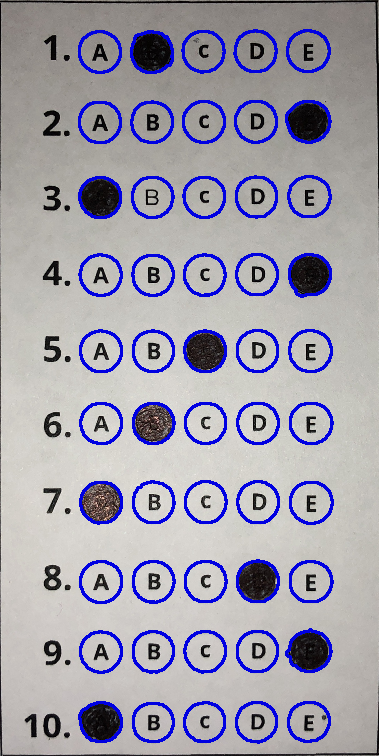

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))
ctns = imutils.grab_contours(cnts)
questionsCnts = []

for c in ctns:
  x, y, w, h = cv2.boundingRect(c)
  print(f'w{w}')
  print(f'h{h}')
  ar = w / float(h)
  print(ar)
  if w >= 20 and h >= 20 and ar >= 0.9 and ar <= 1.1:
    questionsCnts.append(c)

print(len(questionsCnts))
cv2.drawContours(paper, questionsCnts, -1, 225, 2)
cv2_imshow(paper)

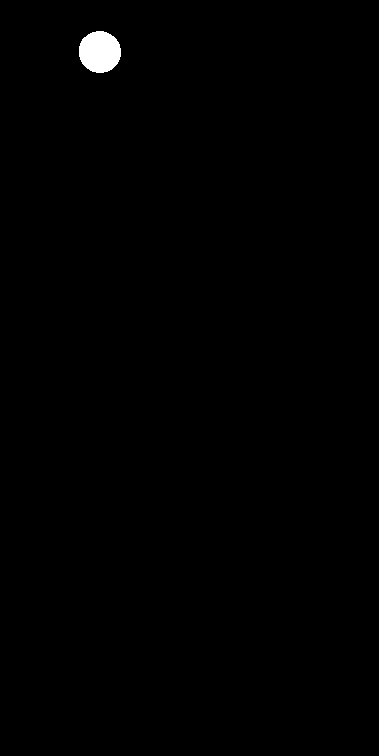

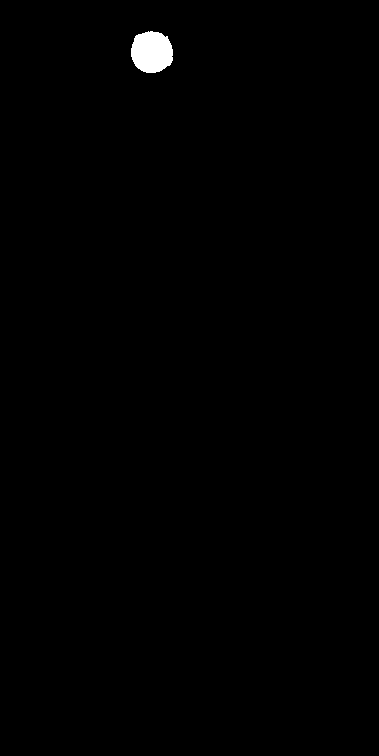

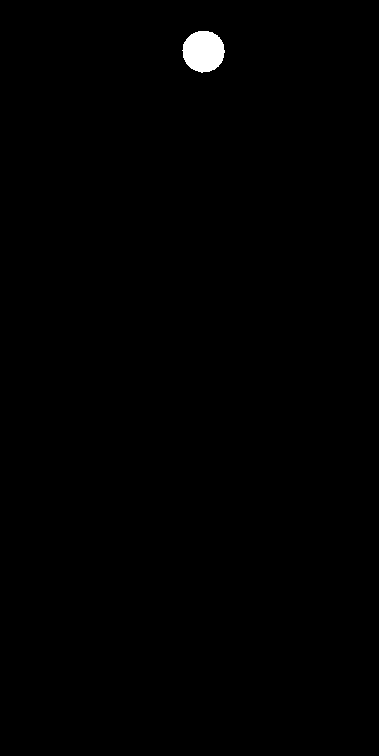

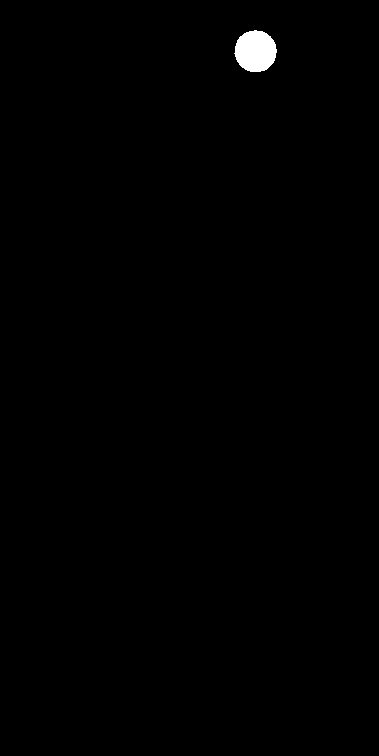

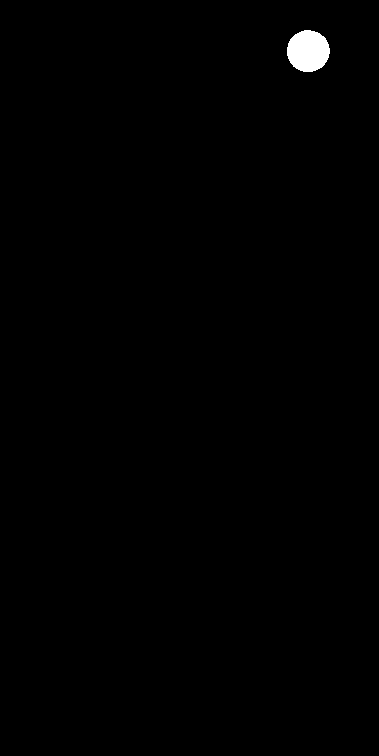

0


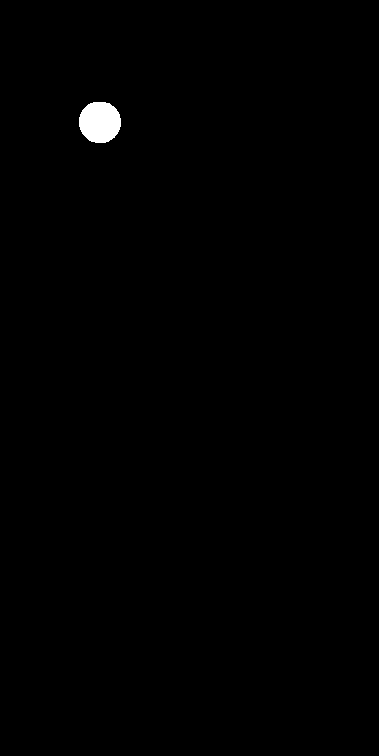

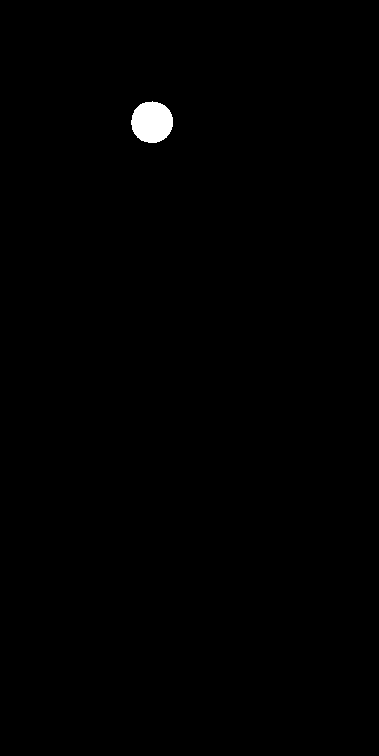

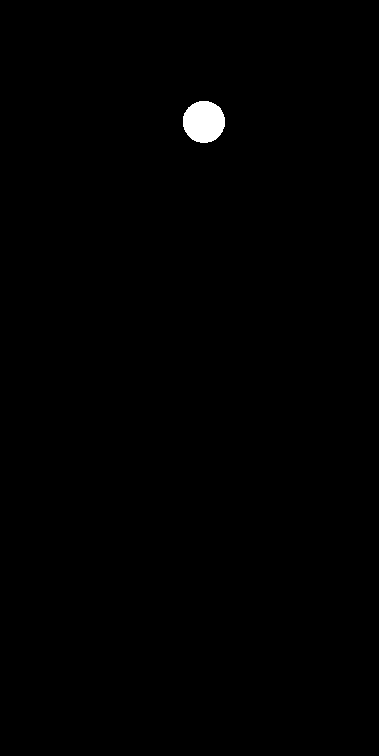

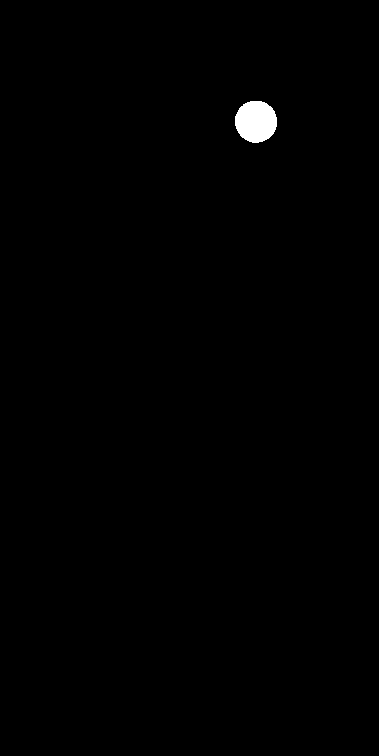

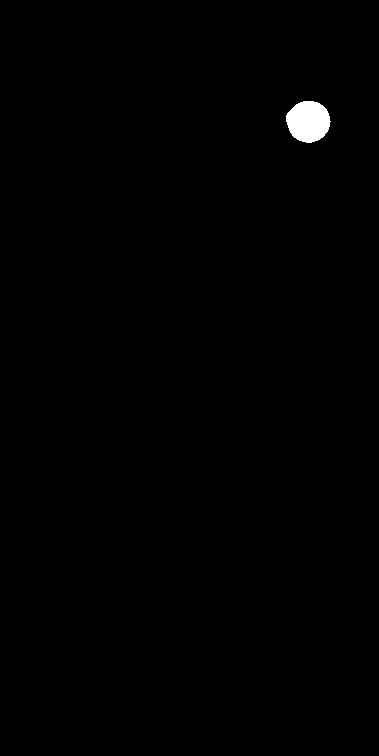

1


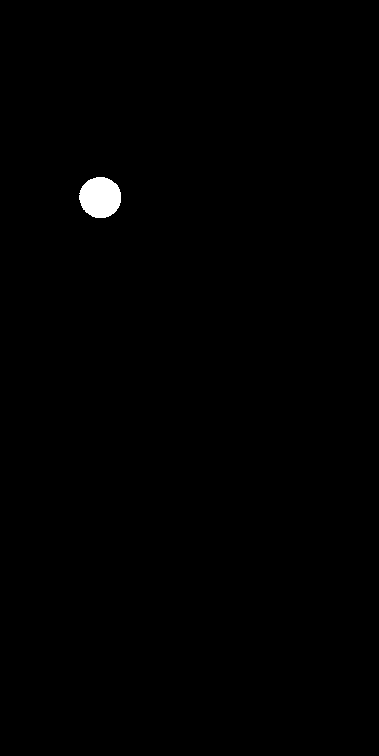

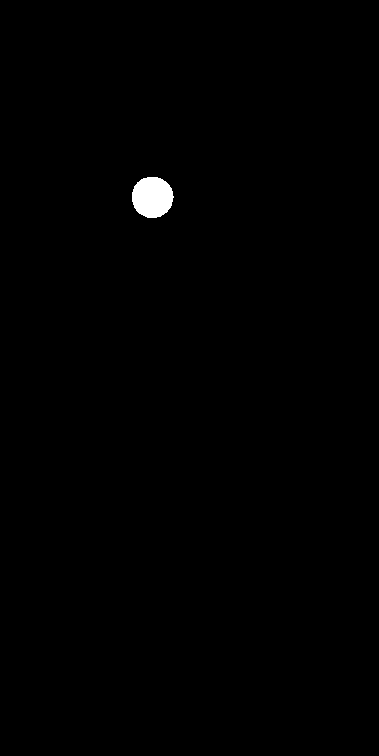

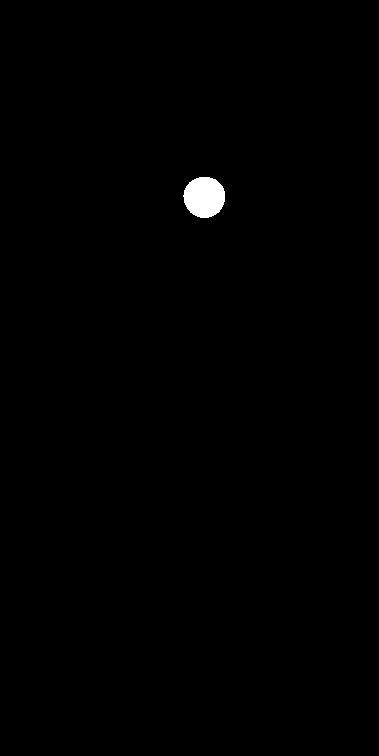

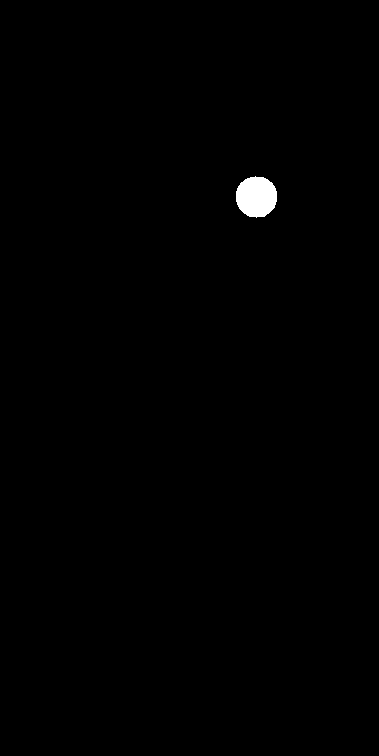

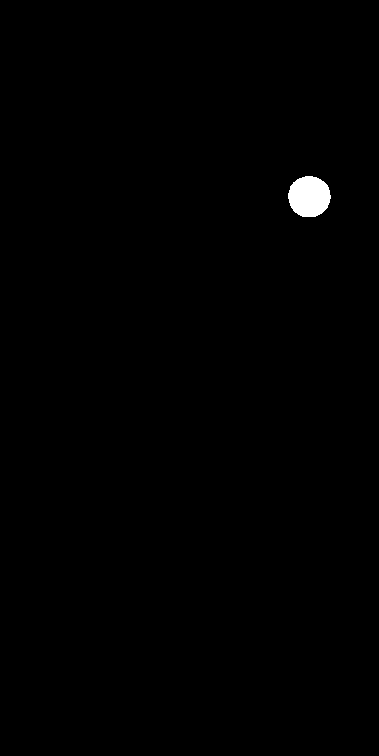

2


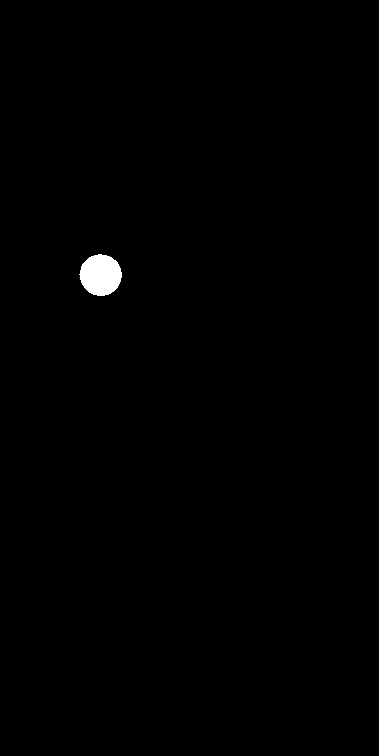

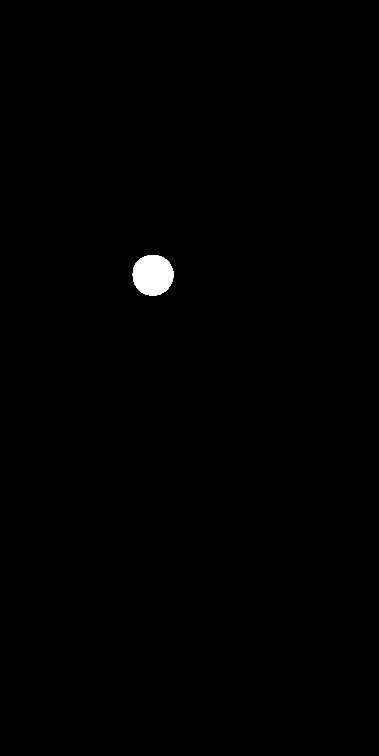

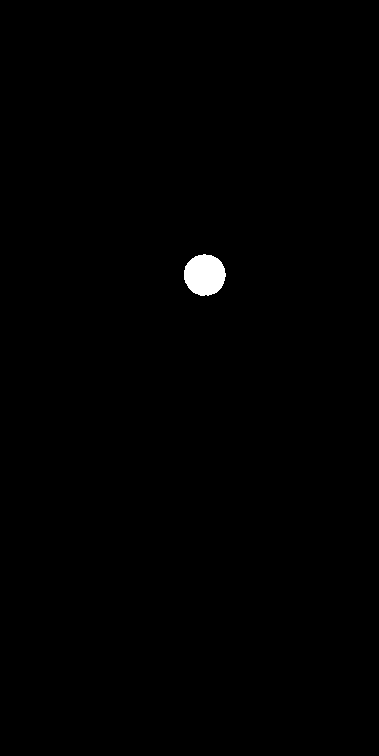

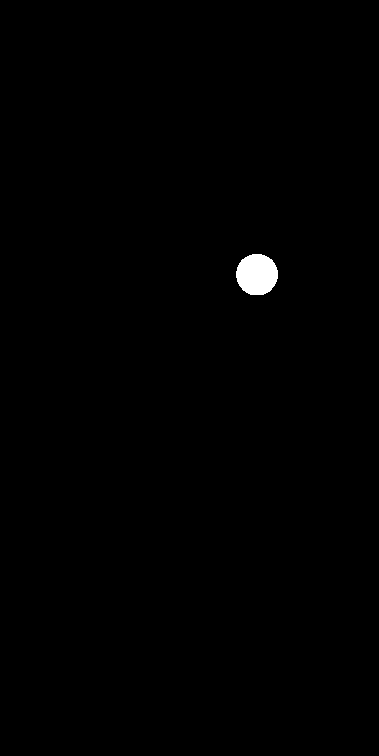

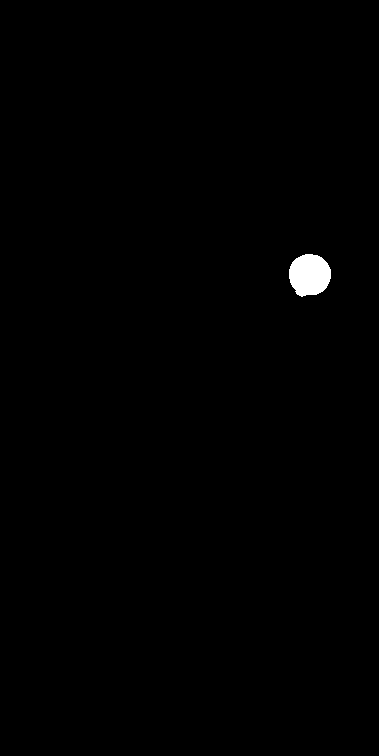

3


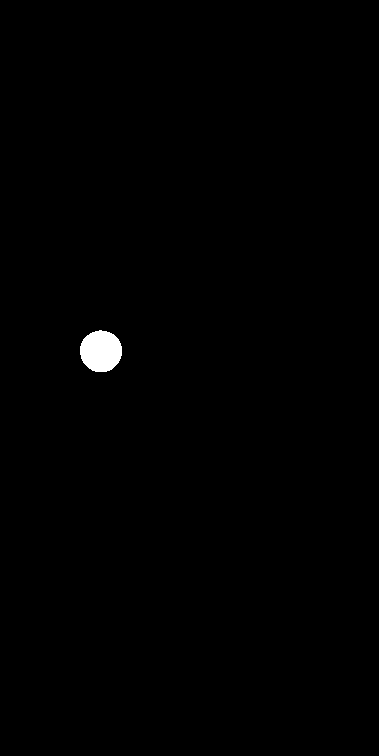

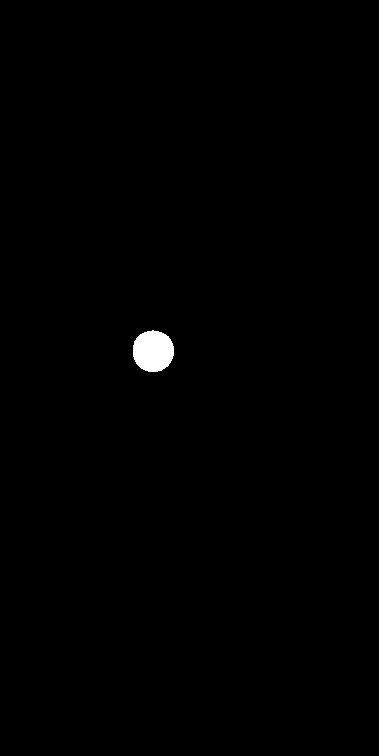

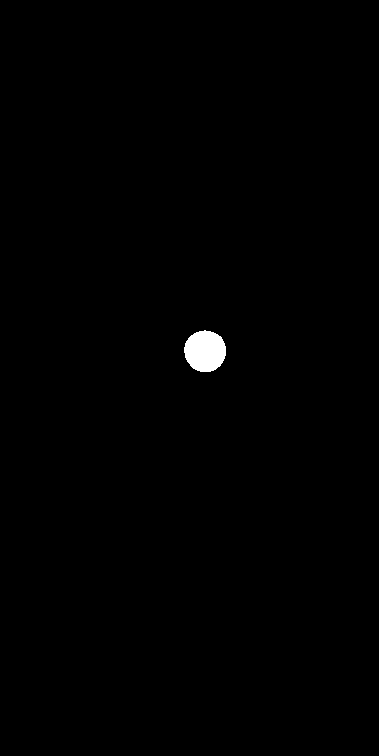

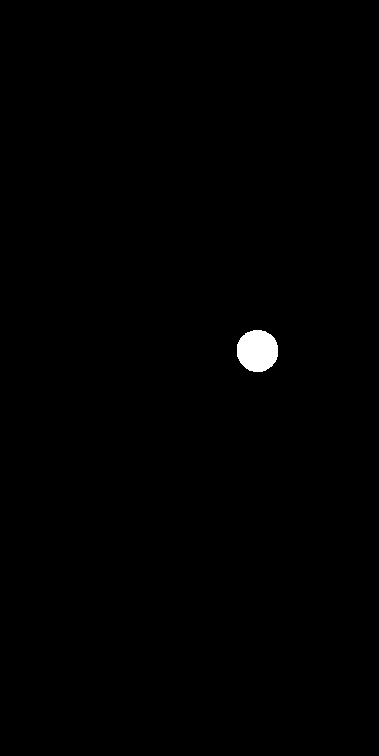

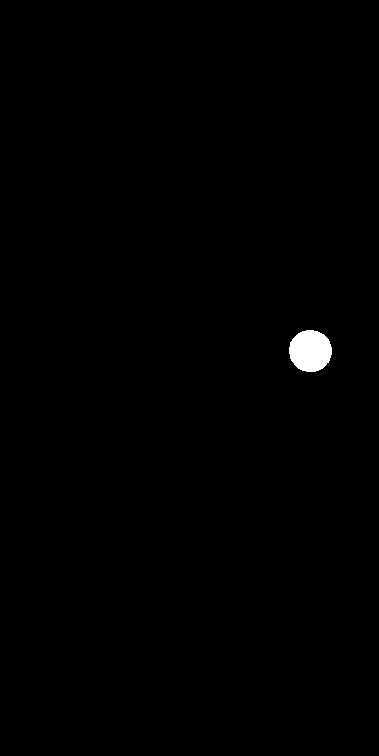

4


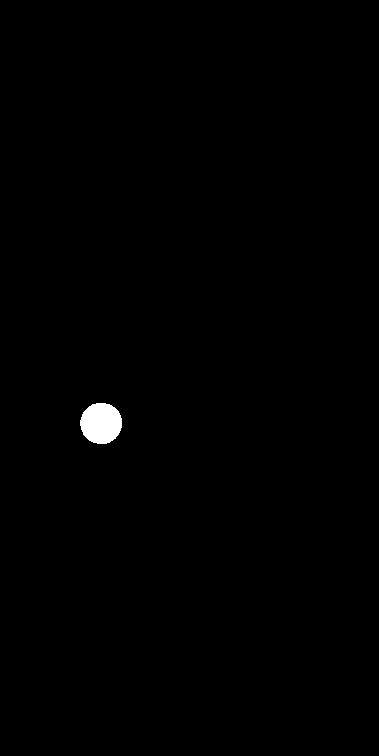

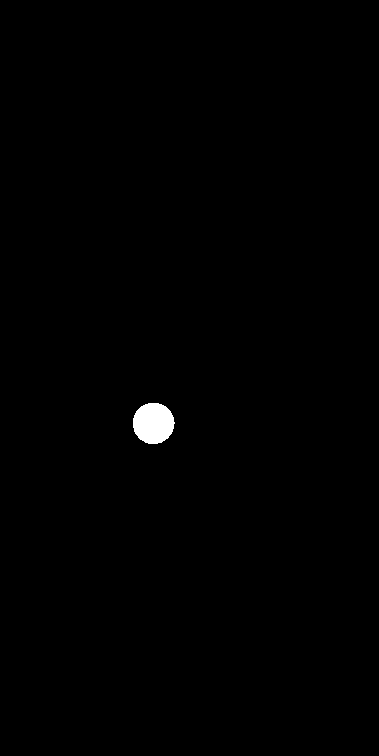

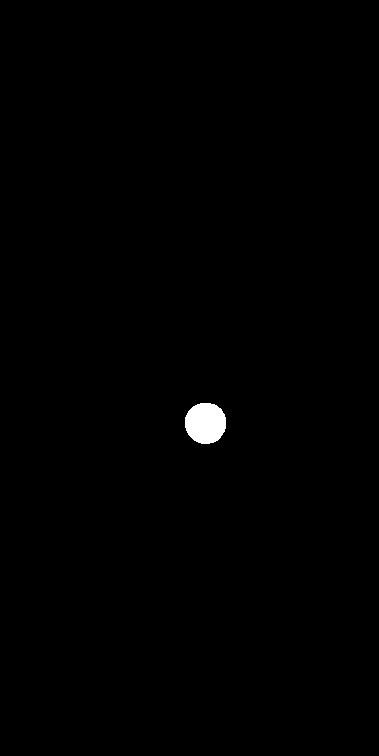

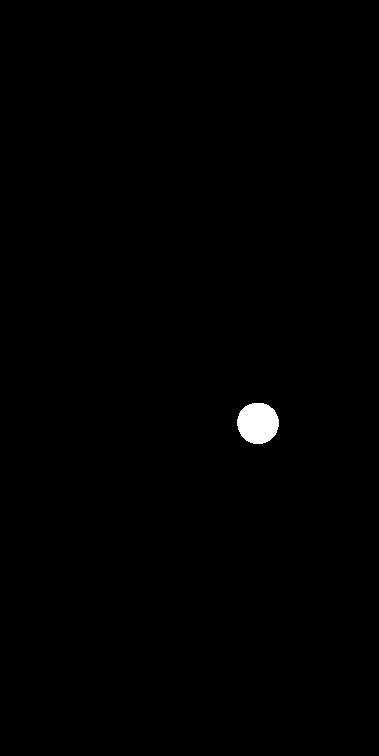

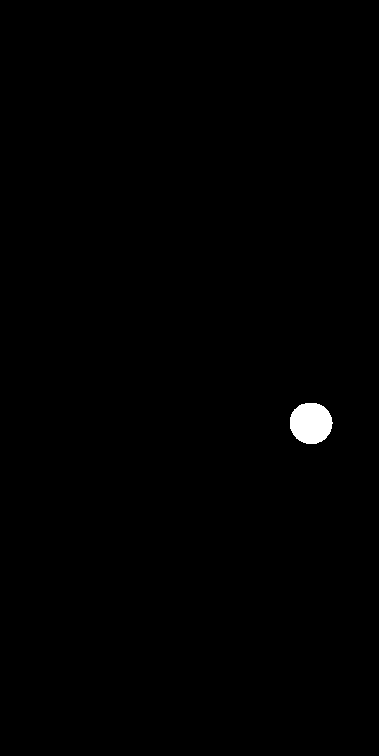

5


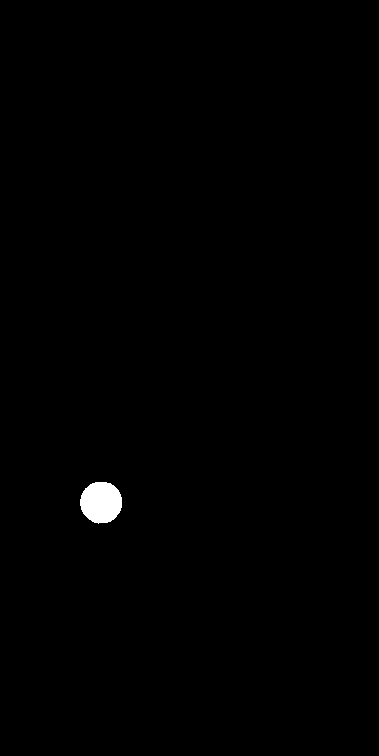

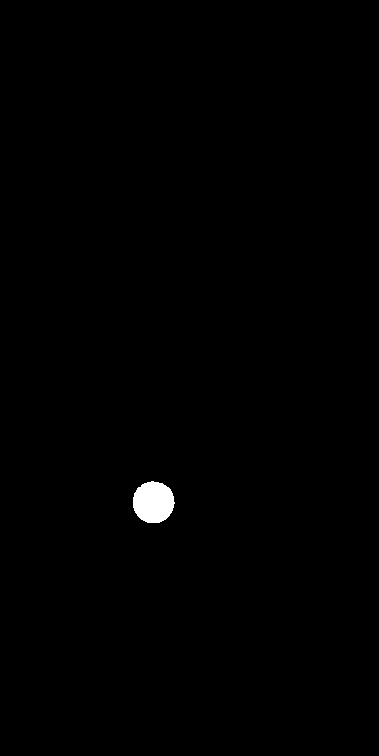

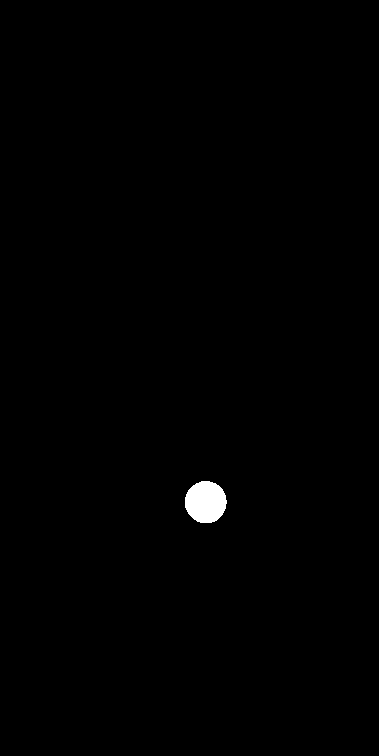

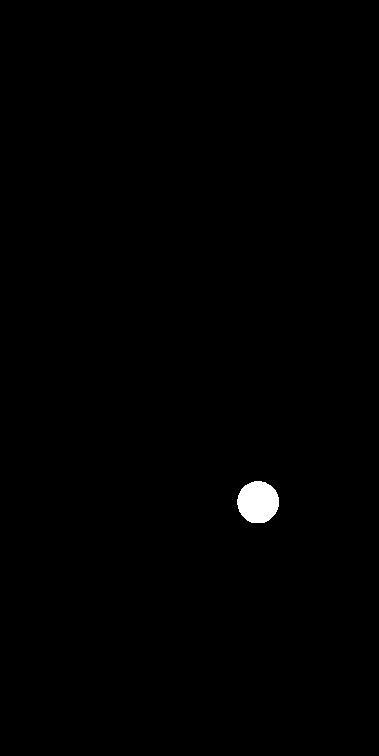

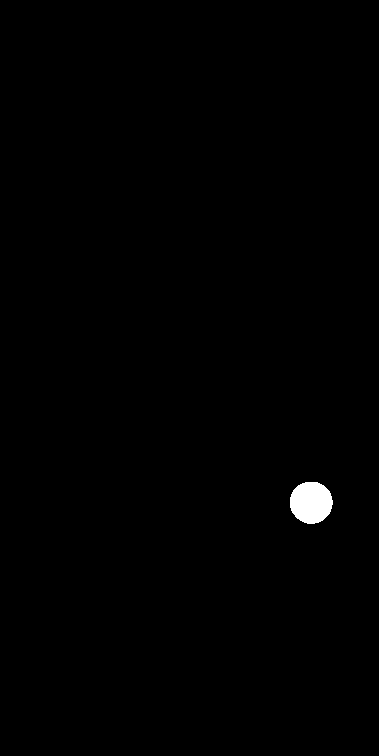

6


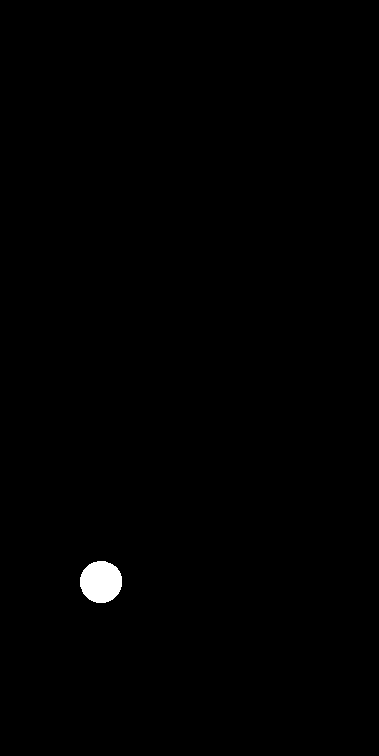

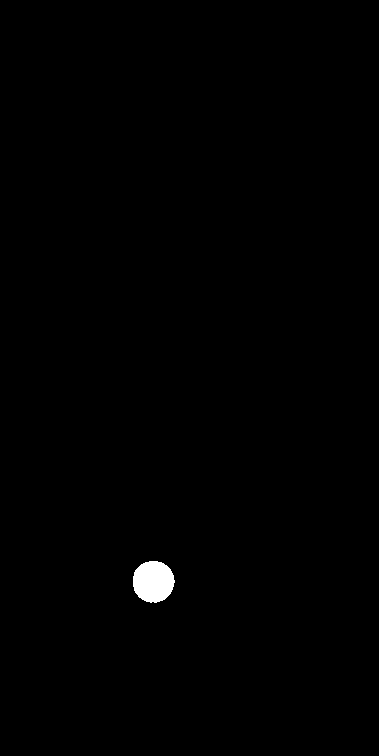

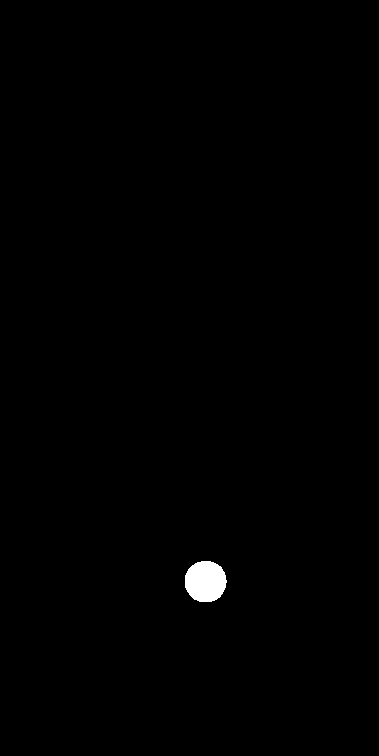

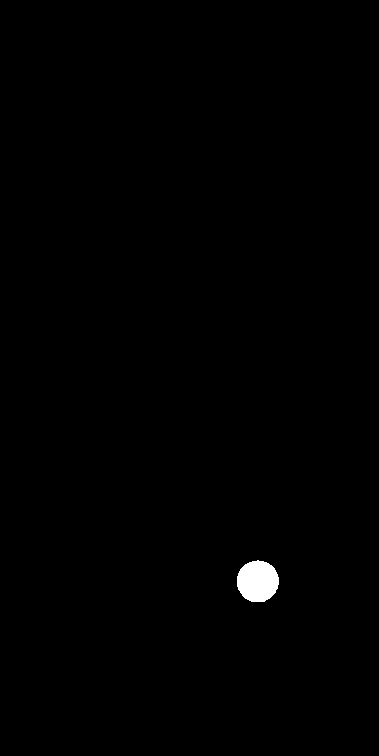

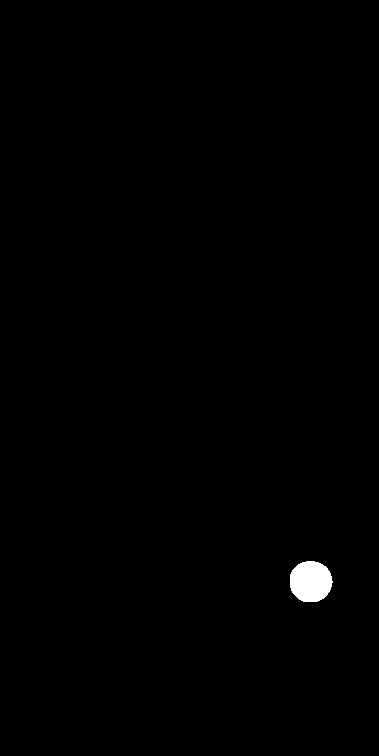

7


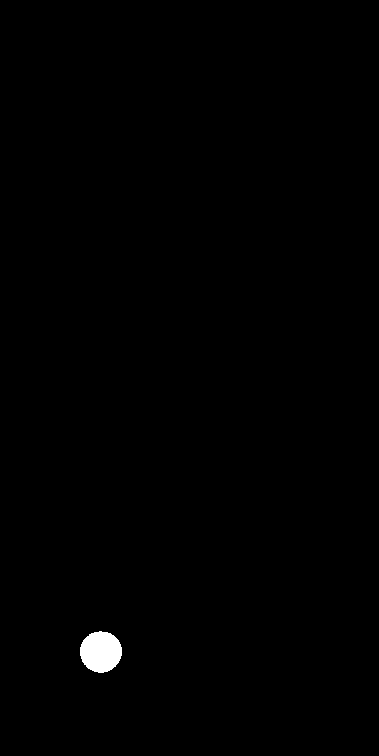

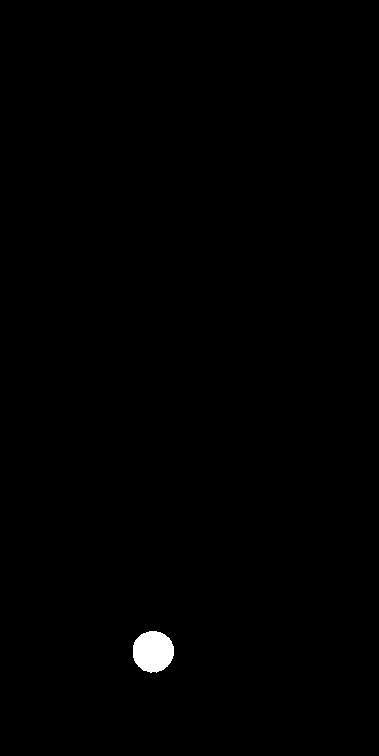

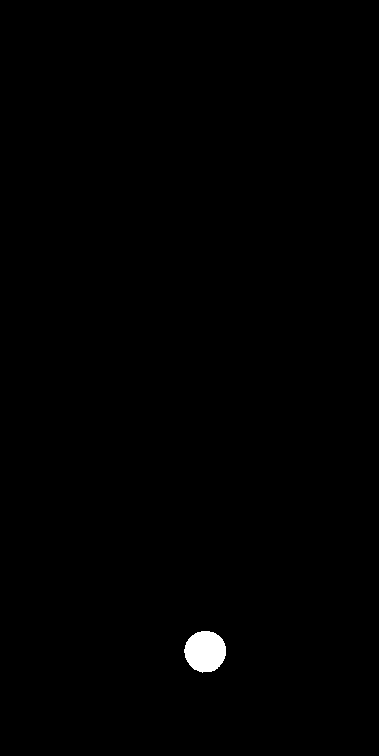

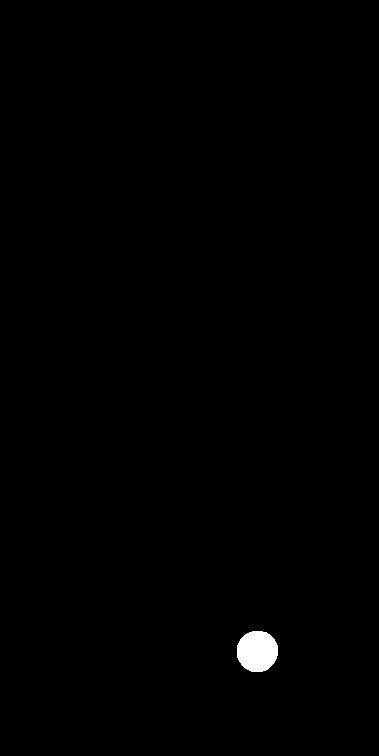

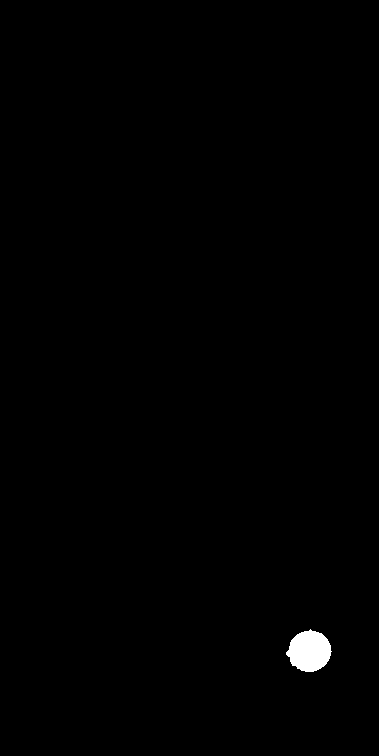

8


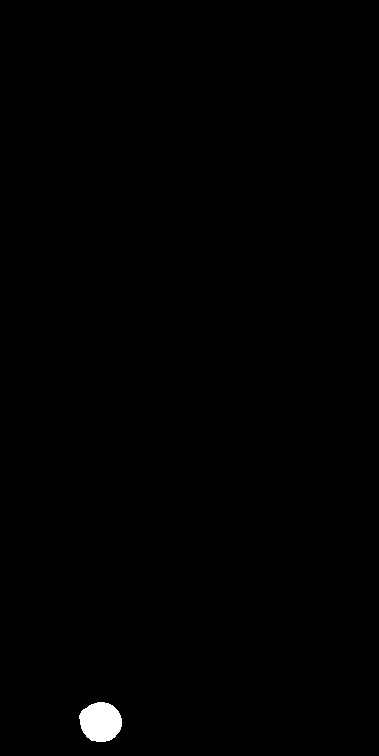

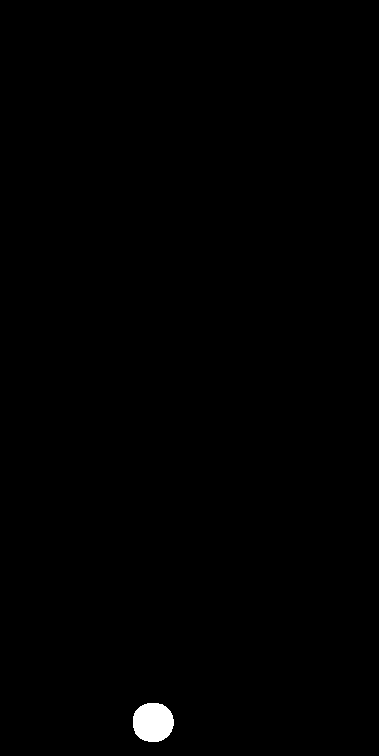

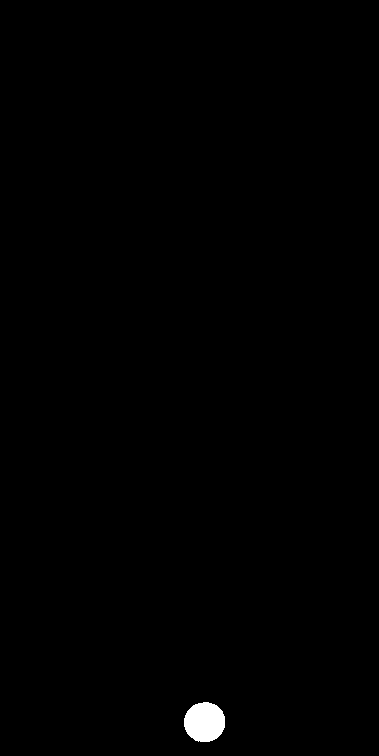

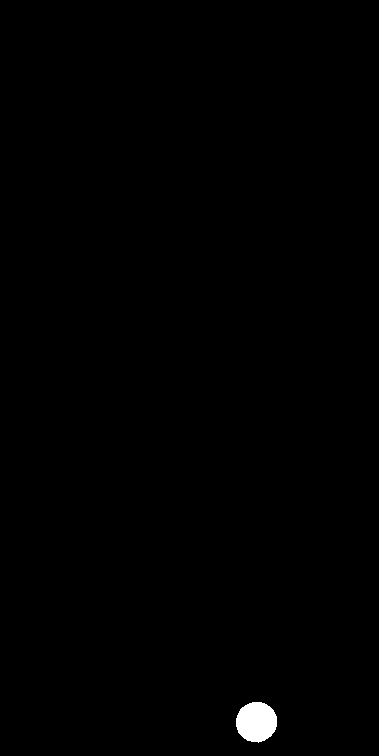

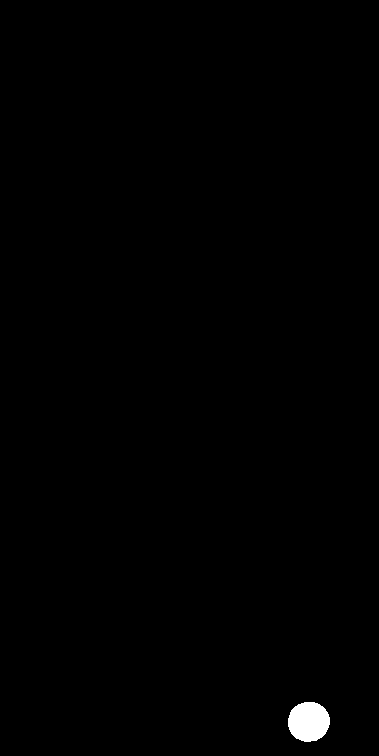

9
3
1


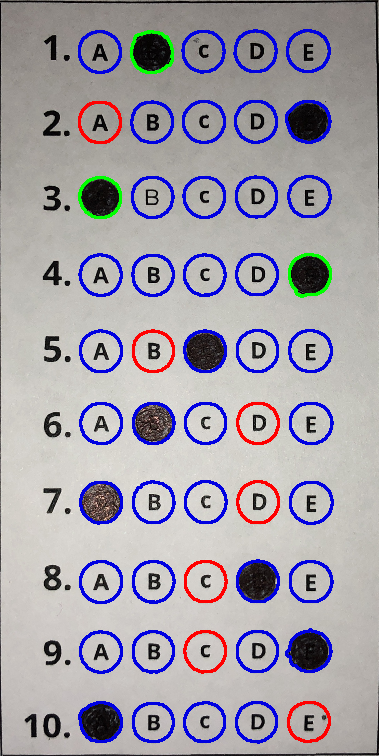

In [8]:
questionCnts = contours.sort_contours(questionsCnts, method = "top-to-bottom")[0]
correct = 0

for (q, i) in enumerate(np.arange(0, len(questionCnts), 5)):
  cnts = contours.sort_contours(questionCnts[i:i + 5])[0]
  bubbled = None

  for (j, c) in enumerate(cnts):
    mask = np.zeros(thresh.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    cv2_imshow(mask)
    mask = cv2.bitwise_and(thresh, thresh, mask=mask)
    total = cv2.countNonZero(mask),


    if bubbled is None or total > bubbled[0]:
      bubbled = (total, j)
    #print(ANSWER_KEY[q])
  cor = (0, 0, 255)
  print(q)
  k = ANSWER_KEY[q]

  if k == bubbled[1]:
    cor = (0, 255, 0)
    correct += 1

  cv2.drawContours(paper, [cnts[k]], -1, cor, 2)
print(correct)
print(len(total))
cv2_imshow(paper)



In [9]:
height, width = mask.shape
video_name = 'mygeneratedvideo.avi'
video = cv2.VideoWriter(video_name, 0, 1, (width, height))

for c in mask:
    video.write(c)

cv2.destroyAllWindows()
video.release()
